In [1]:
%matplotlib inline
from skimage.io import imread
import skimage
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

In [2]:
image = imread('parrots.jpg')

In [3]:
as_float = skimage.img_as_float(image)

In [4]:
X = np.reshape(as_float, (as_float.shape[0]*as_float.shape[1], as_float.shape[2]))

In [13]:
clf = KMeans(init='k-means++', random_state=241, n_clusters=11) 
clf.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=11, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=241, tol=0.0001,
    verbose=0)

In [14]:
y_pred = clf.predict(X)

In [15]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

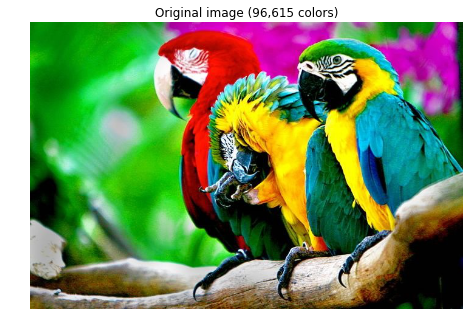

In [16]:
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(as_float)

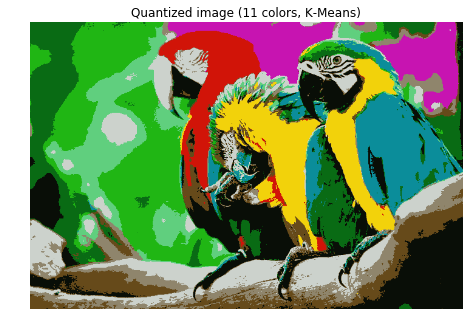

In [17]:
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image ('+str(len(clf.cluster_centers_))+' colors, K-Means)')
plt.imshow(recreate_image(clf.cluster_centers_, y_pred, as_float.shape[0], as_float.shape[1]))

In [18]:
img_centers = X.copy()
for i, v in enumerate(clf.cluster_centers_):
    img_centers[clf.labels_ == i] = v
#np.reshape(img_centers, (as_float.shape[0], as_float.shape[1], 3))

In [19]:
mse = mean_squared_error(X, img_centers)

In [20]:
20*math.log10(1) - 10*math.log10(mse)

20.182819578315456

In [ ]:
clf.cluster_centers_